In [1]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#set the random seed as zero
np.random.seed(0)

/Users/Mandy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/Mandy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#input data 
creditData=pd.read_csv('/Users/Mandy/Study/SpringBoard/Capstone 1/Data/Modified Dataset.csv', header=0)

In [3]:
#subset macro-economic data
limit_bal=creditData.iloc[:,1]
sex=creditData.iloc[:,2]
education=creditData.iloc[:,3]
marriage=creditData.iloc[:,4]
age=creditData.iloc[:,5]
pay_0=creditData.iloc[:,6]
pay_2=creditData.iloc[:,7]
pay_3=creditData.iloc[:,8]
pay_4=creditData.iloc[:,9]
pay_5=creditData.iloc[:,10]
pay_6=creditData.iloc[:,11]
bill_amt1=creditData.iloc[:,12]
bill_amt2=creditData.iloc[:,13]
bill_amt3=creditData.iloc[:,14]
bill_amt4=creditData.iloc[:,15]
bill_amt5=creditData.iloc[:,16]
bill_amt6=creditData.iloc[:,17]
pay_amt1=creditData.iloc[:,18]
pay_amt2=creditData.iloc[:,19]
pay_amt3=creditData.iloc[:,20]
pay_amt4=creditData.iloc[:,21]
pay_amt5=creditData.iloc[:,22]
pay_amt6=creditData.iloc[:,23]
interest_rate=creditData.iloc[:,24]
employed_persons=creditData.iloc[:,25]
cpi=creditData.iloc[:,26]
consumer_confidence=creditData.iloc[:,27]
default_next_month=creditData.iloc[:,28]


In [4]:
# randomly pick the monthly datas to each cells for economic datas

for index,rowValue in interest_rate.iteritems():
        interest_rate[index]=random.choice([1.88,2,2.13])

for index,rowValue in employed_persons.iteritems():
        employed_persons[index]=random.choice([9916,9929,9931,9933,9949,9969])
        
for index,rowValue in cpi.iteritems():
        cpi[index]=random.choice([92.02,92.53,92.82,93.9,94.6,94.73])

for index,rowValue in consumer_confidence.iteritems():
        consumer_confidence[index]=random.choice([73.15,73.06,74.79,73.15,73.38,71.42])


In [5]:
#Data Exploration
default_next_month.value_counts()

0    23364
1     6636
Name: Default_Next_Month, dtype: int64

In [6]:
creditData.groupby('Default_Next_Month').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence
Default_Next_Month,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769,1.664184,9937.939480,92.835816,72.828411
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.672544,9938.371911,92.831374,72.824895


In [7]:
creditData.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,1.665966,9937.930098,92.833025,72.820828,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,1.666078,9938.104075,92.836020,72.832100,0.207763


In [8]:
creditData.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
0,15755.796296,132962.962963,1.740741,2.740741,37.814815,-0.166667,-0.203704,-0.203704,-0.370370,-0.407407,...,2781.944444,4027.944444,2864.222222,2124.518519,2238.388889,1.629630,9934.444444,92.981481,72.962963,0.092593
1,15253.288821,182200.893184,1.620031,1.985138,40.016692,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,...,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,1.667252,9938.304341,92.835566,72.830295,0.234717
2,14807.277813,156413.660737,1.589514,1.729454,31.452706,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,...,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,1.665685,9937.803370,92.834565,72.825294,0.209283
3,13734.154799,98080.495356,1.594427,2.235294,42.798762,0.170279,0.000000,0.024768,-0.024768,-0.142415,...,7865.136223,6150.086687,5121.179567,4563.919505,3408.987616,1.637771,9938.705882,92.792570,72.808050,0.260062


In [9]:
creditData.groupby('Interest_Rate').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
Interest_Rate,,,,,,,,,,,,,,,,,,,,,
1,14978.860665,166782.313604,1.603653,1.850883,1.554047,35.413814,-0.028047,-0.135443,-0.179259,-0.233456,...,5550.305919,5718.607845,5263.945204,5061.749476,4844.581994,5178.983731,9938.178361,92.848787,72.818445,0.216888
2,15011.350533,167836.328512,1.603774,1.854262,1.550773,35.521445,-0.011010,-0.132926,-0.159652,-0.214254,...,5720.379360,6022.730244,5206.495070,4707.904409,4776.725990,5233.814073,9937.963315,92.827836,72.832241,0.223362


In [10]:
creditData.groupby('Employed_Persons').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,CPI,Consumer_Confidence,Default_Next_Month
Employed_Persons,,,,,,,,,,,,,,,,,,,,,
9916,15005.909202,167858.306189,1.602402,1.847313,1.558836,35.347109,-0.029112,-0.146783,-0.189332,-0.253257,...,5588.286849,6374.470684,5277.131515,4892.719666,5094.051914,5400.720073,1.676303,92.837948,72.832248,0.220277
9929,15050.867795,164898.428053,1.600363,1.853486,1.558041,35.438331,-0.000202,-0.137042,-0.151350,-0.209391,...,6032.965135,5924.861346,4761.716848,4672.854696,4694.444579,4818.559855,1.663845,92.827892,72.811366,0.216848
9931,14798.386701,165046.507026,1.603602,1.843657,1.548783,35.362359,-0.001187,-0.115971,-0.142688,-0.208787,...,5500.199683,5660.694241,5587.168019,4855.430042,4615.257471,4941.416584,1.667920,92.852959,72.834554,0.223432
9933,15011.067132,171570.043112,1.599466,1.850749,1.555943,35.615685,-0.015397,-0.143913,-0.182098,-0.242455,...,5637.526175,5813.257853,5274.949292,5137.066311,5073.645453,5672.230959,1.659618,92.835557,72.825908,0.209403
9949,15064.811405,168022.576878,1.608992,1.858895,1.550993,35.370378,-0.040677,-0.143246,-0.178863,-0.225963,...,5537.057999,6028.309459,5080.402686,4569.854807,4788.507201,4801.920008,1.665629,92.827559,72.830284,0.226158
9969,15072.158570,167611.769352,1.607227,1.864336,1.539100,35.780411,-0.013231,-0.116311,-0.153633,-0.185624,...,5691.128357,5732.824250,5369.705569,4843.110190,4547.361572,5678.587283,1.662915,92.827212,72.831161,0.230450


In [11]:
creditData.groupby('CPI').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,Consumer_Confidence,Default_Next_Month
CPI,,,,,,,,,,,,,,,,,,,,,
92,15045.322408,168282.520401,1.603478,1.857926,1.551906,35.476522,-0.013913,-0.139331,-0.169097,-0.224214,...,5864.245151,5901.546221,5196.780602,4892.991839,4808.226622,5106.554582,1.672910,9938.112107,72.829766,0.221405
93,14960.691395,169703.264095,1.600989,1.840950,1.559446,35.517507,-0.013452,-0.130959,-0.162216,-0.211474,...,5559.844115,5440.551533,5248.572502,4911.573492,4774.586548,5219.475767,1.653017,9938.033432,72.843126,0.224530
94,14953.590295,165168.184092,1.605503,1.852126,1.547974,35.482741,-0.022511,-0.126863,-0.163882,-0.220010,...,5415.901751,6193.576888,5257.332766,4682.748774,4798.709955,5376.451826,1.662331,9937.920860,72.816608,0.219210


In [12]:
creditData.groupby('Consumer_Confidence').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Default_Next_Month
Consumer_Confidence,,,,,,,,,,,,,,,,,,,,,
71,14996.017108,164491.744579,1.596976,1.860553,1.557788,35.387706,-0.012930,-0.129302,-0.158146,-0.221802,...,5697.375174,5846.758504,5149.248856,4619.349910,4525.261985,4557.682514,1.658842,9938.112592,92.845833,0.222996
73,14983.615630,167646.275759,1.604778,1.850473,1.550274,35.494126,-0.014186,-0.132155,-0.162270,-0.221155,...,5692.702439,5937.578099,5268.672773,4907.538427,4859.391339,5360.755898,1.666849,9937.940717,92.833649,0.220757
74,15074.582019,169898.832685,1.606390,1.856441,1.552324,35.550686,-0.030924,-0.144993,-0.190661,-0.217489,...,5508.973582,5930.228548,5127.490272,4703.745034,4834.725579,5295.109769,1.670080,9938.343846,92.828384,0.221176


In [13]:
creditData['x_bin']=pd.cut(x=creditData.AGE, bins=[20,30,40,50,60,70]) 

Text(0,0.5,'Frequency')

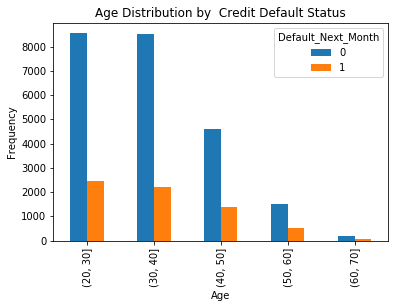

In [14]:
%matplotlib inline
#bar chart of age grouped by default
pd.crosstab(creditData.x_bin,default_next_month).plot(kind='bar')
plt.title('Age Distribution by  Credit Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [15]:
#Separate the dataset into dependent and independent variables
X=creditData.drop('Default_Next_Month',axis=1)
X=X.drop('ID',axis=1)
X=X.drop('x_bin',axis=1) 
y=creditData['Default_Next_Month']

#then seperate it into training set, validation set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15)
 

In [16]:
#######MODEL ONE: LOGISTIC REGRESSION MODEL######
LR_classifier = LogisticRegression()

In [17]:
#10-fold cross-validation,if the evaluation score suggests not overfitting, predict the default status for each sample in test set
LR_cross_val_scores = cross_val_score(LR_classifier,X_train,y_train,n_jobs=-1,scoring='accuracy',cv=10)
print("The 10 fold cross validation score based on Logistic Regression Model is: %0.3f(+-%0.3f)"%(LR_cross_val_scores.mean(),LR_cross_val_scores.std()*2))

if LR_cross_val_scores.mean() >0.97:
    print (" The Logistic Regression Model is overfitting in this case.")
else:
    LR_classifier.fit(X_train,y_train)
    LR_predicted=LR_classifier.predict(X_test)
    #generate default probabilities based on test set
    LR_prob_default=np.sum(LR_predicted)/len(LR_predicted)
    print("The Default Probability based on Logistic Regression Model is :",'%.3f'%LR_prob_default)
    LR_accuracy=LR_classifier.score(X_test,y_test)
    print("The accuracy of Logistic Regression Model on test set is : ",'%.3f'%LR_accuracy)

The 10 fold cross validation score based on Logistic Regression Model is: 0.778(+-0.000)
The Default Probability based on Logistic Regression Model is : 0.000
The accuracy of Logistic Regression Model on test set is :  0.784


In [18]:
#create a dataframe to store evaluation info of different models
evaluation = pd.DataFrame({'Model':['Logistic Regression'],'Default_Probability':[LR_prob_default],'Cross_Validation_Accuracy':[LR_cross_val_scores.mean()],'Test_Accuracy':[LR_accuracy]})
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                 Model  Default_Probability  Cross_Validation_Accuracy  \
0  Logistic Regression                  0.0                   0.777765   

   Test_Accuracy  
0       0.784222  


In [19]:
#########MODEL TWO: RANDOM FOREST MODEL#########
RF_classifier = RandomForestClassifier(random_state=0)

In [20]:
# 10 Fold Cross Validation over the entire training set
RF_cross_val_scores=cross_val_score(RF_classifier,X_train,y_train,cv=10,n_jobs=-1,scoring='accuracy')
print("The 10 fold cross validation score based on Random Forest Model is: %0.3f(+/-%0.3f)"%(RF_cross_val_scores.mean(),RF_cross_val_scores.std()*2))

# if the score is less than 0.975, then build the classifier with the entire training set
if RF_cross_val_scores.mean() >0.97:
    print (" The Random Forest Model is overfitting in this case.")
else:
    RF_classifier.fit(X_train,y_train)
    RF_predicted=RF_classifier.predict(X_test)
    RF_prob_default=np.sum(RF_predicted)/len(RF_predicted)
    print("The Default Probability based on Random Forest Model is :",'%.3f'%RF_prob_default)
    RF_accuracy=RF_classifier.score(X_test,y_test)
    print("The accuracy of Random Forest Model on test set is : ",'%.3f'%RF_accuracy)
    print(metrics.confusion_matrix(y_test,RF_predicted))
    print(metrics.classification_report(y_test,RF_predicted))

The 10 fold cross validation score based on Random Forest Model is: 0.805(+/-0.014)
The Default Probability based on Random Forest Model is : 0.110
The accuracy of Random Forest Model on test set is :  0.808
[[3335  194]
 [ 670  301]]
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      3529
          1       0.61      0.31      0.41       971

avg / total       0.78      0.81      0.78      4500



In [21]:
features_weight=RF_classifier.fit(X_test,y_test).feature_importances_
feature_index = np.where(features_weight==max(features_weight))
feature_index=int(feature_index[0][0])
print("The most important feature is:",(list(X_test)[feature_index]))

The most important feature is: PAY_0


In [22]:
#output the result into the existing evaluation dataframe to compare with other model
new_evaluation=pd.DataFrame({'Model':["Random Forest"],'Default_Probability':[RF_prob_default],'Cross_Validation_Accuracy':[RF_cross_val_scores.mean()],'Test_Accuracy':[RF_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                 Model  Default_Probability  Cross_Validation_Accuracy  \
0  Logistic Regression                 0.00                   0.777765   
0        Random Forest                 0.11                   0.805098   

   Test_Accuracy  
0       0.784222  
0       0.808000  


In [23]:
########MODEL THREE: NAIVE BAYES -Non Scaled #######################
NB_classifier=GaussianNB()
#10-fold cross validation for the entire standardized training data without scaling/normalization/standarization
NB_NonScaled_cross_val_scores=cross_val_score(NB_classifier,X_train,y_train,cv=10,n_jobs=-1,scoring='accuracy')
print("The 10 fold cross validation score based on Naive Bayes Model(Non Scaled) is: %0.3f(+/-%0.3f)"%(NB_NonScaled_cross_val_scores.mean(),NB_NonScaled_cross_val_scores.std()*2))

The 10 fold cross validation score based on Naive Bayes Model(Non Scaled) is: 0.378(+/-0.021)


In [24]:
if NB_NonScaled_cross_val_scores.mean() >0.97:
    print ("The Naive Bayes Model (Non Scaled) is overfitting in this case.")
else:
    NB_classifier.fit(X_train,y_train)
    NB_NonScaled_predicted=NB_classifier.predict(X_test)
    NB_NonScaled_prob_default=np.sum(NB_NonScaled_predicted)/len(NB_NonScaled_predicted)
    print("The Default Probability based on Naive Bayes Model(Non Scaled) is :",'%.3f'%NB_NonScaled_prob_default)
    NB_NonScaled_accuracy=NB_classifier.score(X_test,y_test)
    print("The accuracy of Naive Bayes Model(Non Scaled) on test set is : ",'%.3f'%NB_NonScaled_accuracy)

The Default Probability based on Naive Bayes Model(Non Scaled) is : 0.805
The accuracy of Naive Bayes Model(Non Scaled) on test set is :  0.368


In [25]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Naive Bayes_NonScaled"],'Default_Probability':[NB_NonScaled_prob_default],'Cross_Validation_Accuracy':[NB_NonScaled_cross_val_scores.mean()],'Test_Accuracy':[NB_NonScaled_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                   Model  Default_Probability  Cross_Validation_Accuracy  \
0    Logistic Regression             0.000000                   0.777765   
0          Random Forest             0.110000                   0.805098   
0  Naive Bayes_NonScaled             0.804889                   0.378040   

   Test_Accuracy  
0       0.784222  
0       0.808000  
0       0.367778  


In [26]:
###################MODEL FOUR: NAIVE BAYES ( SCALED) ############################
#Standardization
scaler=StandardScaler()
NB_classifier_scaled=GaussianNB()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [27]:
#10-fold cross validation for the entire standardized training set
NB_Scaled_cross_val_scores=cross_val_score(NB_classifier_scaled,X_train_scaled,y_train,cv=10,n_jobs=-1,scoring='accuracy')
print("The 10 fold cross validation score based on Naive Bayes Model(Scaled) is: %0.3f(+/-%0.3f)" %(NB_Scaled_cross_val_scores.mean(),NB_Scaled_cross_val_scores.std()*2))

The 10 fold cross validation score based on Naive Bayes Model(Scaled) is: 0.717(+/-0.062)


In [28]:
if NB_Scaled_cross_val_scores.mean() >0.97:
    print (" The Naive Bayes Model (scaled) is overfitting in this case.")
else:
    NB_classifier_scaled.fit(X_train_scaled,y_train)
    NB_Scaled_predicted=NB_classifier_scaled.predict(X_test_scaled)
    NB_Scaled_prob_default=np.sum(NB_Scaled_predicted)/len(NB_Scaled_predicted)
    print("The Default Probability based on Naive Bayes Model(Scaled) is :",'%.3f'%NB_Scaled_prob_default)
    NB_Scaled_accuracy=NB_classifier_scaled.score(X_test_scaled,y_test)
    print("The accuracy of Naive Bayes Model(Scaled) on test set is : ",'%.3f'%NB_Scaled_accuracy)

The Default Probability based on Naive Bayes Model(Scaled) is : 0.348
The accuracy of Naive Bayes Model(Scaled) on test set is :  0.714


In [29]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Naive Bayes_Scaled"],'Default_Probability':[NB_Scaled_prob_default],'Cross_Validation_Accuracy':[NB_Scaled_cross_val_scores.mean()],'Test_Accuracy':[NB_Scaled_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                   Model  Default_Probability  Cross_Validation_Accuracy  \
0    Logistic Regression             0.000000                   0.777765   
0          Random Forest             0.110000                   0.805098   
0  Naive Bayes_NonScaled             0.804889                   0.378040   
0     Naive Bayes_Scaled             0.347778                   0.717061   

   Test_Accuracy  
0       0.784222  
0       0.808000  
0       0.367778  
0       0.713778  


In [30]:
############### MODEL FIVE: VOTING CLASSIFIER WITH NON-SCALED DATA #############
#build a voting classifier based on different models' accuracies
VT_classifier_nonscaled=VotingClassifier(estimators=[('Logistic Regression',LR_classifier),('Random Forest',RF_classifier),('Naive Bayes',NB_classifier)],voting='soft',weights=[LR_accuracy,RF_accuracy,NB_NonScaled_accuracy])
# 10-fold cross validation
VT_NonScaled_cross_val_scores=cross_val_score(VT_classifier_nonscaled,X_train,y_train,cv=10,scoring='accuracy')
print("The 10 fold cross validation score based on Voting Classifier(Non-Scaled) is: %0.3f(+/-%0.3f)" %(VT_NonScaled_cross_val_scores.mean(),VT_NonScaled_cross_val_scores.std()*2))

The 10 fold cross validation score based on Voting Classifier(Non-Scaled) is: 0.807(+/-0.011)


In [31]:
if VT_NonScaled_cross_val_scores.mean() >0.97:
    print ("The Voting Classifier (Non Scaled) is overfitting in this case.")
else:
    VT_classifier_nonscaled.fit(X_train,y_train)
    VT_NonScaled_predicted=VT_classifier_nonscaled.predict(X_test)
    VT_NonScaled_prob_default=np.sum(VT_NonScaled_predicted)/len(VT_NonScaled_predicted)
    print("The Default Probability based on Voting Classifier(Non Scaled) is :",'%.3f'%VT_NonScaled_prob_default)
    VT_NonScaled_accuracy=VT_classifier_nonscaled.score(X_test,y_test)
    print("The accuracy of Voting Classifier(Non Scaled) on test set is : ",'%.3f'%VT_NonScaled_accuracy)

The Default Probability based on Voting Classifier(Non Scaled) is : 0.103
The accuracy of Voting Classifier(Non Scaled) on test set is :  0.812


In [32]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Voting Classifier_NonScaled"],'Default_Probability':[VT_NonScaled_prob_default],'Cross_Validation_Accuracy':[VT_NonScaled_cross_val_scores.mean()],'Test_Accuracy':[VT_NonScaled_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                         Model  Default_Probability  \
0          Logistic Regression             0.000000   
0                Random Forest             0.110000   
0        Naive Bayes_NonScaled             0.804889   
0           Naive Bayes_Scaled             0.347778   
0  Voting Classifier_NonScaled             0.102667   

   Cross_Validation_Accuracy  Test_Accuracy  
0                   0.777765       0.784222  
0                   0.805098       0.808000  
0                   0.378040       0.367778  
0                   0.717061       0.713778  
0                   0.807176       0.811778  


In [33]:
################ MODEL SIX: VOTING CLASSIFIER WITH SCALED DATA ##############
#build a voting classifier based on different models' accuracies
VT_classifier_scaled=VotingClassifier(estimators=[('Logistic Regression',LR_classifier),('Random Forest',RF_classifier),('Naive Bayes',NB_classifier_scaled)],voting='soft',weights=[LR_accuracy,RF_accuracy,NB_Scaled_accuracy])
# 10-fold cross validation
VT_Scaled_cross_val_scores=cross_val_score(VT_classifier_scaled,X_train,y_train,cv=10,scoring='accuracy')
print("The 10 fold cross validation score based on Voting Classifier(Scaled) is: %0.3f(+/-%0.3f)" %(VT_Scaled_cross_val_scores.mean(),VT_Scaled_cross_val_scores.std()*2))

The 10 fold cross validation score based on Voting Classifier(Scaled) is: 0.797(+/-0.016)


In [34]:
if VT_Scaled_cross_val_scores.mean() >0.97:
    print ("The Voting Classifier (Scaled) is overfitting in this case.")
else:
    VT_classifier_scaled.fit(X_train_scaled,y_train)
    VT_Scaled_predicted=VT_classifier_scaled.predict(X_test_scaled)
    VT_Scaled_prob_default=np.sum(VT_Scaled_predicted)/len(VT_Scaled_predicted)
    print("The Default Probability based on Voting Classifier(Scaled) is :",'%.3f'%VT_Scaled_prob_default)
    VT_Scaled_accuracy=VT_classifier_scaled.score(X_test_scaled,y_test)
    print("The accuracy of Voting Classifier(Scaled) on test set is : ",'%.3f'%VT_Scaled_accuracy)

The Default Probability based on Voting Classifier(Scaled) is : 0.174
The accuracy of Voting Classifier(Scaled) on test set is :  0.808


In [35]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Voting Classifier_Scaled"],'Default_Probability':[VT_Scaled_prob_default],'Cross_Validation_Accuracy':[VT_Scaled_cross_val_scores.mean()],'Test_Accuracy':[VT_Scaled_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                         Model  Default_Probability  \
0          Logistic Regression             0.000000   
0                Random Forest             0.110000   
0        Naive Bayes_NonScaled             0.804889   
0           Naive Bayes_Scaled             0.347778   
0  Voting Classifier_NonScaled             0.102667   
0     Voting Classifier_Scaled             0.173556   

   Cross_Validation_Accuracy  Test_Accuracy  
0                   0.777765       0.784222  
0                   0.805098       0.808000  
0                   0.378040       0.367778  
0                   0.717061       0.713778  
0                   0.807176       0.811778  
0                   0.796784       0.807556  
